# What sells a car?

Now, We are analysing at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. We need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Purposes of the analysis

To determine the factors which influence to the price of the car and the correlation between different factors and the priceof the car.

## Hypotheses

1. Car age have negative correlation with the price of the car. The older the car the cheaper its price
1. Average mileage per year have negative correlation with the price of the car. The more mileage the cheaper the price of the car
1. The condition of the car has positive correlation with its price. The better condition, the more expensive the price of the car
1. The type of the transmission has no correlation with the price of the car
1. The paint color of the car has no correlation with the price of the car

## Initialization

Loading libraries that are required for the project

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to output more than 1 variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


### Load data

Loading the project data and having a look at the general information.

In [2]:
# Loading the data
try:
    data = pd.read_csv('/datasets/vehicles_us.csv')
except FileNotFoundError:
    data = pd.read_csv('E:\\Израиль\\Practicum\\vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `type` - the vehicle's type (sadan, hachback etc)
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# printing the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


We have several problems with the data. We have missing values at least in the columns: `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`. So, rather big number of missing values, we should investigate this. Also, the types of the columnes `model_year`, and `date_posted` should be changed to the appropriate value types. We are also going to change the type of `cylinders` column, it should be int, as there is no vehicle that have 4,5 cylinders for example. We should also check the `is_4wd` columns, because there only 2 options 1 and 0 (yes or no) for that column.

In [5]:
data['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

We have no duplicates in `model` column, that's good.

In [6]:
data['condition'].unique()
data['fuel'].unique()
data['condition'].unique()
data['transmission'].unique()
data['type'].unique()
data['paint_color'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

array(['automatic', 'manual', 'other'], dtype=object)

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

other categorical columns look also fine

In [7]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

We have 5 columns with missing values, the most missing is `is_4wd` column. Almost half of the data. But we can try to treat it using the values for the same type of vehicles, we hope to find this info in our data. The same approach can be applyed to the `cylynders` column. The missing values in `model_year`, `odometer` and `paint_color` we can investigate further and my be replace with the mean, median values or most common values.

### Conclusions and further steps

As we have no duplicates in the categorical columns, our main problem is to treat the missing values. We start with that, and we'll fix issues with the column types, and in the end we'll add some columns with age of the car, day of the week, month, and year the ad was placed, the vehicle's average mileage per year. These columns will make our analysis more clear and simple.

## Treat missing values (if any)

Let's start treating the `is_4wd` column. First we replace missing values with 0, and then we will see if we have the same models with 1 in `is_4wd` column, or thouse models with the missing values are non 4wd. 

In [8]:
data['is_4wd'].unique()
data['is_4wd'] = data['is_4wd'].fillna(0)
data['is_4wd'].value_counts()
data.pivot_table(index = 'model', values = 'is_4wd', aggfunc = 'mean').query('is_4wd==0')

array([ 1., nan])

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

,is_4wd
model,
chevrolet camaro lt coupe 2d,0.0
chevrolet impala,0.0
ford econoline,0.0
ford mustang gt coupe 2d,0.0
mercedes-benz benze sprinter 2500,0.0
toyota prius,0.0


We have only 6 models which is not 4wd. It seems we are selling 4wd cars in the most cases. Let's treat this column

In [9]:
#Creating dictionary with 4wd cars
is_4wd_dict = data.query('is_4wd==1').groupby(['model'])['is_4wd'].mean().to_dict()

#Replacing the missing 4wd marks
data['is_4wd'] = data.apply(lambda x: is_4wd_dict[x['model']] if x['model'] in is_4wd_dict else x['is_4wd'], axis=1)
data['is_4wd'].value_counts()
data.pivot_table(index = 'model', values = 'is_4wd', aggfunc = 'mean').query('is_4wd==0')

1.0    49420
0.0     2105
Name: is_4wd, dtype: int64

,is_4wd
model,
chevrolet camaro lt coupe 2d,0.0
chevrolet impala,0.0
ford econoline,0.0
ford mustang gt coupe 2d,0.0
mercedes-benz benze sprinter 2500,0.0
toyota prius,0.0


We have fixed this issue. We have the same names in the pivot table where we have collected non 4wd cars, and now only 2105 of them are not 4wd, the rest are 4wd, we changed the missing values correctly. <br>
Let's do the same thing with the `model_year` column. We will replace the missing model years with the most common values of those model. It's the best we can do in order not to loose a big part of our data.

In [10]:
# Creating dictionary of most common model years
model_year_dict=data.groupby('model')['model_year'].apply(lambda x: x.value_counts().idxmax()).to_dict()

#Replaicing missing values
data['model_year']=data['model_year'].fillna(data.model.map(model_year_dict))
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

We have fixed the issue, now we don't have missing values in `model_year` column any more. Let's see what we have in `cylinders` column

In [11]:
data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

We have some strange number of cylinders as 3,5 and even 10. So, let's create a dictionary with the most common number of cylinders for each model, and then we will replace the number of cylinders for each row with the values from the dictionary as we did for `is_4wd` column.

In [12]:
#Creating dictionary with number of cylinders for each model
cylinders_dict = data.groupby('model')['cylinders'].apply(lambda x: x.value_counts().idxmax()).to_dict()

#Replacing the values in `cylinders` column with the values from the dictionary
data['cylinders'] = data.apply(lambda x: cylinders_dict[x['model']], axis = 1)
data['cylinders'].value_counts()
data.isna().sum()


8.0    18299
6.0    17190
4.0    16036
Name: cylinders, dtype: int64

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

It seems people sometimes do not know exactly the number of cylinders for their cars. But we We have successfully treated that issue. <br> let's treat the `odometer` column. We will take age (model year) and model as the factors to determine mean odometer and replace the missing values with that value.

In [13]:
#Replacing the missing values in `odometer` column
data['odometer'] = data['odometer'].fillna(data.groupby(['model' , 'model_year'])['odometer'].transform('mean'))

#Check that it work
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51442 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We still have some missing values in `odometer` column. That means, that we did not manage to find some means for model and model year together. The age (model year) is the most important factor. So, let's do the same thing but we will grup just for model year

In [14]:
#Replacing the rest of missing values in `odometer` column
data['odometer'] = data['odometer'].fillna(data.groupby('model_year')['odometer'].transform('mean'))

#Check that it work
data.info()
data.query('odometer.isna()==True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,1.0,2018-11-18,59


We have one row with the car almost 100 years old. It will defenitely be one of outliers in the analysis, so let's just drop this row.

In [15]:
#Droping 1 row in `odometer` column
data = data.dropna(subset=["odometer"])

#Check that it work
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51524 non-null  int64  
 1   model_year    51524 non-null  float64
 2   model         51524 non-null  object 
 3   condition     51524 non-null  object 
 4   cylinders     51524 non-null  float64
 5   fuel          51524 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51524 non-null  object 
 8   type          51524 non-null  object 
 9   paint_color   42257 non-null  object 
 10  is_4wd        51524 non-null  float64
 11  date_posted   51524 non-null  object 
 12  days_listed   51524 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


 So, we have replaced missing values in `model_year`, `cylinders`, `is_4wd` and `odometer` columns. Now we have `paint_color` column, but there is no pattern that we can use to treat this. In the same time, it is a big piece of data, so, we will replace missing values in this column with "unknown" value.

In [16]:
#Replacing the rest of the missing values with "unknown" value
data['paint_color'].fillna('unknown', inplace = True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51524 non-null  int64  
 1   model_year    51524 non-null  float64
 2   model         51524 non-null  object 
 3   condition     51524 non-null  object 
 4   cylinders     51524 non-null  float64
 5   fuel          51524 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51524 non-null  object 
 8   type          51524 non-null  object 
 9   paint_color   51524 non-null  object 
 10  is_4wd        51524 non-null  float64
 11  date_posted   51524 non-null  object 
 12  days_listed   51524 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


We have successfully improved our data, we restored the model year, number of cylinders and the 4wd mark, also we have replaced all missing values from our data.<br> Let's fix the data types. `model_years`, `cylinders` and `is_4wd` columns should be int, and `date_posted` should be date-time type.

## Fix data types

We start with integer columns, and than we will change date-time columns

In [17]:
#Changing model_years, cylinders and is_4wd columns to  int type
data['model_year'] = data['model_year'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['is_4wd'] = data['is_4wd'].astype(int)

#Changing `date_posted` to date-time type
data['date_posted'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d')
data.info()
data.head(5)
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int32         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int32         
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  int32         
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(6)
memory usage: 4.9+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2013,ford f-150,good,8,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,1,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,175165.5,automatic,pickup,unknown,1,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,1,2019-04-02,28


0

We have successfully changed the types of the columns. the data in `date_posted` column looks the same way but now we can work with this column as it is known now as date. Also we have checked that there is no duplicates in our data.

## Enrich data

Let's add additional factors to the data to make the analysis easier. We will add day of the week, month, and year the ad was placed, the vehicle's age (in years) when the ad was placed and the vehicle's average mileage per year

In [18]:
# Add datetime values for when the ad was placed
data['year_placed'] = data['date_posted'].dt.year
data['month_placed'] = data['date_posted'].dt.month
data['week_day_placed'] = data['date_posted'].dt.weekday
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_placed,month_placed,week_day_placed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5
1,25500,2013,ford f-150,good,8,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,10,4
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,1,2019-02-07,79,2019,2,3
3,1500,2003,ford f-150,fair,8,gas,175165.5,automatic,pickup,unknown,1,2019-03-22,9,2019,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,1,2019-04-02,28,2019,4,1


With the added columns we will be able to calcultate the age of the car and to determine the dependence of the add lifetime from the week day of the ad placement. <br> Let's calculate the age of the car as year of ad placement minus model_year of the car. Although sometimes we can buy the car of the previous model year in the present year, but in terms of price of the car, model year is the most important factor 

In [19]:
# Add the vehicle's age when the ad was placed
data['age'] = data['year_placed'] - data['model_year']
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_placed,month_placed,week_day_placed,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7
1,25500,2013,ford f-150,good,8,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,1,2019-02-07,79,2019,2,3,6
3,1500,2003,ford f-150,fair,8,gas,175165.5,automatic,pickup,unknown,1,2019-03-22,9,2019,3,4,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,1,2019-04-02,28,2019,4,1,2


Let's calculate average milege per year as `odometer` divided by `age`. In case of unknown odometer we will place unknown value aswell. And for the new cars (age is zero) we will put `odometer` to `year_milage` column

In [20]:
# Add the vehicle's average mileage per year
data['year_mileage'] = data.apply(lambda x: x['odometer'] if x['age'] == 0 else x['odometer'] / x['age'], axis = 1)
data.head(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_placed,month_placed,week_day_placed,age,year_mileage
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714.285714
1,25500,2013,ford f-150,good,8,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5,17741.000000
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,1,2019-02-07,79,2019,2,3,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,175165.5,automatic,pickup,unknown,1,2019-03-22,9,2019,3,4,16,10947.843750
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,1,2019-04-02,28,2019,4,1,2,40451.500000


Looks fine. Let's improove the `condition` column. First we will look at the values we have there

In [21]:
data['condition'].value_counts()

excellent    24773
good         20144
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

So, let's make the categories: new will get 5, like new - 4, excellent - 3, good - 2, fair - 1, and salvage wil get 0 points

In [22]:
# Creating `condition_dic` dictionary
condition_dic = {'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}

#Replacing the `condition` column with the values from the dictionary
data['condition'] = data.apply(lambda x: condition_dic[x['condition']], axis =1)
data.head(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_placed,month_placed,week_day_placed,age,year_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714.285714
1,25500,2013,ford f-150,2,8,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5,17741.000000
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,1,2019-02-07,79,2019,2,3,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,175165.5,automatic,pickup,unknown,1,2019-03-22,9,2019,3,4,16,10947.843750
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,1,2019-04-02,28,2019,4,1,2,40451.500000


## Check clean data

Given the data is ready for the analysis, let's take just another quick look at it. We will see what exactly we are going to use for our analysis.

In [23]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51524 non-null  int64         
 1   model_year       51524 non-null  int32         
 2   model            51524 non-null  object        
 3   condition        51524 non-null  int64         
 4   cylinders        51524 non-null  int32         
 5   fuel             51524 non-null  object        
 6   odometer         51524 non-null  float64       
 7   transmission     51524 non-null  object        
 8   type             51524 non-null  object        
 9   paint_color      51524 non-null  object        
 10  is_4wd           51524 non-null  int32         
 11  date_posted      51524 non-null  datetime64[ns]
 12  days_listed      51524 non-null  int64         
 13  year_placed      51524 non-null  int64         
 14  month_placed     51524 non-null  int64

In [24]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_placed,month_placed,week_day_placed,age,year_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,2018,6,5,7,20714.285714
1,25500,2013,ford f-150,2,8,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,2018,10,4,5,17741.000000
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,1,2019-02-07,79,2019,2,3,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,175165.5,automatic,pickup,unknown,1,2019-03-22,9,2019,3,4,16,10947.843750
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,1,2019-04-02,28,2019,4,1,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2018,6,2,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,1,2018-12-27,73,2018,12,3,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,2019,1,0,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,2018,7,0,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,2019,2,4,11,13381.000000


## Study core parameters

Let's study the core parameters of our data. 

We will investigate:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'year_mileage'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>]],
      dtype=object)

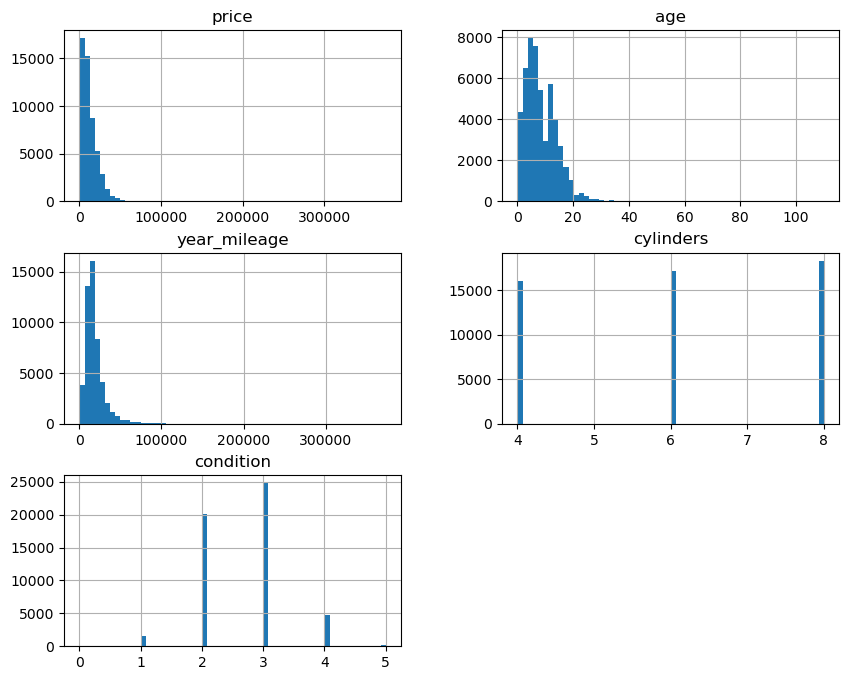

In [25]:
#Plotting the histograms on core parameters
data.hist(column=['price', 'age', 'year_mileage', 'cylinders', 'condition'], figsize=(10,8),bins=60)


Obviousely we 3 column distribution for cylinders, as we have ony 3 values, and 5 column distribution for condition as we have 5 categories there. We have some outliers at `price`, `age` and `year_mileage` columns that we are going to remove. <br> Let's look at `days_listed` distribution

<AxesSubplot:>

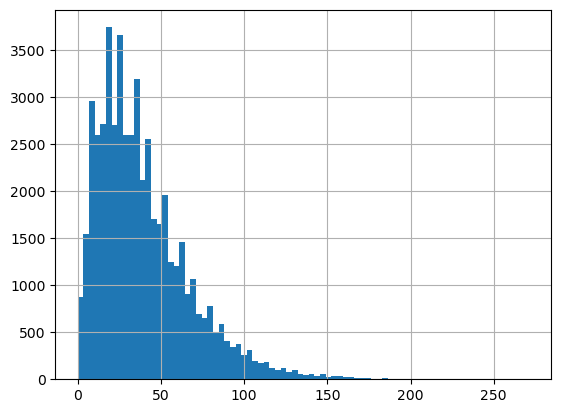

In [26]:
#Plotting the histogram on life-time cycle of the ads
data['days_listed'].hist(bins=80)


Here we also have outliers the most of them after 150 day period. Looks like in the most cases the adds life time cycle from several days to 2 months. And it is absolutely unusual to sell the car mor than 4 months. So we will replace thees outliers but also store them to the separate table

## Study and treat outliers

We have outliers in `age` column where we will clean the data more than 30 years, and also outliers in `days_listed` column where we are going to investigate and remoove outliers we have detected using percentile method.

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

371.46000000000004

37995.0

<AxesSubplot:>

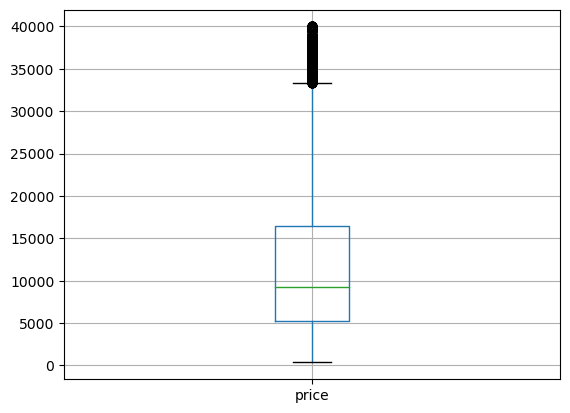

In [27]:
# Determine the limits for `price' column
data.price.describe()
np.percentile(data.price, 2)
np.percentile(data.price, 98)

#Saving outliers to the variable
data_outliers = data.query('price < 350 or price >40000')

#Filtering data without oultliers
data_filt = data.query('350<=price<=40000')
data_filt.boxplot('price')

According to the 2% rule the most of prices are form 350 to 40000

count    51524.000000
mean         8.432672
std          6.148167
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

0.0

23.0

<AxesSubplot:>

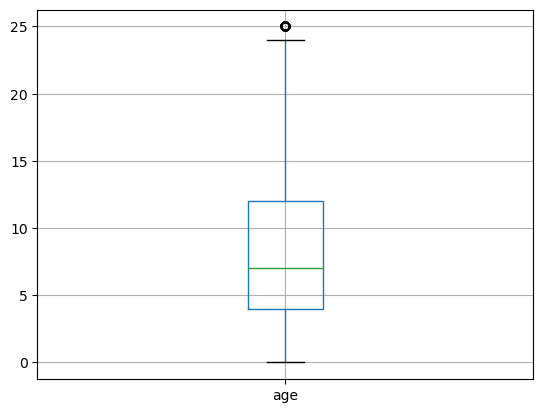

In [28]:
# Determine the limits for `age' column
data.age.describe()
np.percentile(data.age, 2)
np.percentile(data.age, 98)

#Saving outliers to the variable
data_outliers = data.query('age >25')

#Filtering data without oultliers
data_filt = data.query('age<=25')
data_filt.boxplot('age')


We have many new cars, but those which are older than 25 years are above our plotbox. 

count     51524.000000
mean      18366.774653
std       13548.496407
min           0.000000
25%       10911.419780
50%       15289.391026
75%       22066.666667
max      373200.000000
Name: year_mileage, dtype: float64

1128.2547169811323

57151.153333333365

<AxesSubplot:>

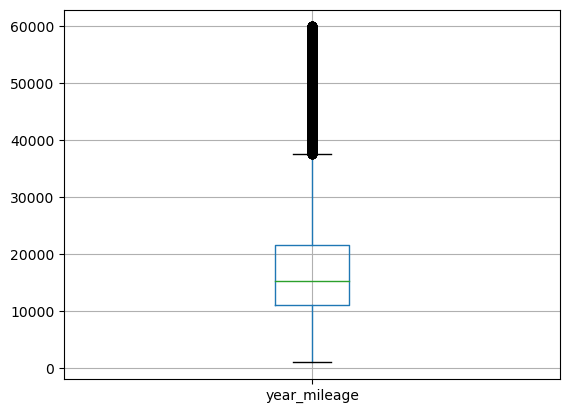

In [29]:
# Determine the limits for `year_milage' column
data.year_mileage.describe()
np.percentile(data.year_mileage, 2)
np.percentile(data.year_mileage, 98)

#Saving outliers to the variable
data_outliers = data.query('year_mileage < 1000 or year_mileage >60000')

#Filtering data without oultliers
data_filt = data.query('1000<=year_mileage<=60000')
data_filt.boxplot('year_mileage')

Tipical mileage is from 1000 to 60000 per year

count    51524.000000
mean        39.554382
std         28.204413
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

4.0

115.0

<AxesSubplot:>

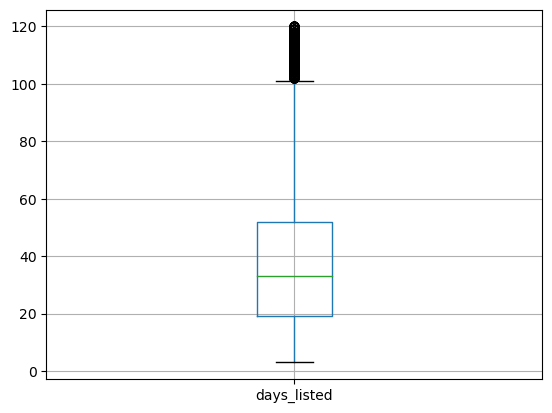

In [30]:
# Determine the limits for the life-time of the ads
data.days_listed.describe()
np.percentile(data.days_listed, 2)
np.percentile(data.days_listed, 98)

#Saving outliers to the variable
data_outliers = data.query('days_listed < 3 or days_listed >120')

#Filtering data without oultliers
data_filt = data.query('3<=days_listed<=120')
data_filt.boxplot('days_listed')

120 days - 4 months it is reasonable period for the life-time cycle. And the most of the data is within it. Also it is not typical where ad is listed less than 3 days

In [31]:
#Saving outliers to variable
data_outliers = data.query('(price<350 or price>40000) or age>25 or (year_mileage<1000 or year_mileage>60000) or (days_listed<3 or days_listed>120)')

#Filtering data without oultliers
data_filt = data.query('350<=price<=40000 and age<=25 and 1000<=year_mileage<=60000 and 3<=days_listed<=120')

# Check outliers and compare with the original DataFrame
data_outliers.info()
len(data_outliers)/len(data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5236 entries, 34 to 51502
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            5236 non-null   int64         
 1   model_year       5236 non-null   int32         
 2   model            5236 non-null   object        
 3   condition        5236 non-null   int64         
 4   cylinders        5236 non-null   int32         
 5   fuel             5236 non-null   object        
 6   odometer         5236 non-null   float64       
 7   transmission     5236 non-null   object        
 8   type             5236 non-null   object        
 9   paint_color      5236 non-null   object        
 10  is_4wd           5236 non-null   int32         
 11  date_posted      5236 non-null   datetime64[ns]
 12  days_listed      5236 non-null   int64         
 13  year_placed      5236 non-null   int64         
 14  month_placed     5236 non-null   int64

0.10162254483347566

We have 5236 rows of outliers but about 10% of the full data. So, without those outliers our results will be relevant

## Study core parameters without outliers

Let's make new plots and compare with the earlier ones.

In [32]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46288 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            46288 non-null  int64         
 1   model_year       46288 non-null  int32         
 2   model            46288 non-null  object        
 3   condition        46288 non-null  int64         
 4   cylinders        46288 non-null  int32         
 5   fuel             46288 non-null  object        
 6   odometer         46288 non-null  float64       
 7   transmission     46288 non-null  object        
 8   type             46288 non-null  object        
 9   paint_color      46288 non-null  object        
 10  is_4wd           46288 non-null  int32         
 11  date_posted      46288 non-null  datetime64[ns]
 12  days_listed      46288 non-null  int64         
 13  year_placed      46288 non-null  int64         
 14  month_placed     46288 non-null  int64

<AxesSubplot:>

<AxesSubplot:>

(0.0, 65000.0)

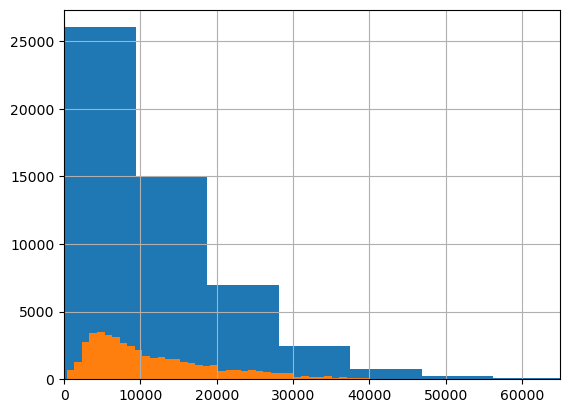

In [33]:
#Plotting and comparing the price histograms
data['price'].hist(bins=40)
data_filt['price'].hist(bins=40)
plt.xlim(0,65000)

We have good picture, The distibution  is much smoother. We have not many cheap cars, but after the average price we have smooth decreasing curve, the more expensive the car the less number of ads, but the expensive cars affect the mean, so the mean is greater than the median. Usual distribution for price

<AxesSubplot:>

<AxesSubplot:>

(0.0, 60.0)

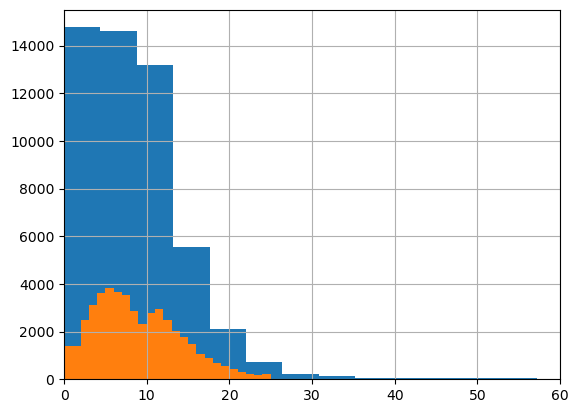

In [34]:
#Plotting and comparing the age histograms
data['age'].hist(bins=25)
data_filt['age'].hist(bins=25)
plt.xlim(0,60)

Now we have pretty good picture of the car age distribution. It is clear that we have relatievly small number of new cars, most of the cars are not older than 6 years old, after that the number of cars than older than that value is decreasing. We have mean age more than the median, that is reasonable. Olso we have second top about 11 years old, that we have not seen before cleaning the outliers. It is interresting that in the age 10-11 years old cars are more popular than in the age 7-8 years old

<AxesSubplot:>

<AxesSubplot:>

(0.0, 80000.0)

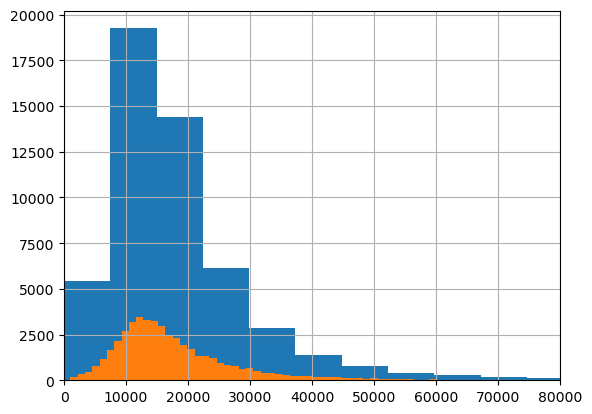

In [35]:
#Plotting and comparing the year_mileage histograms
data['year_mileage'].hist(bins=50)
data_filt['year_mileage'].hist(bins=50)
plt.xlim(0,80000)

The distribution of year mileage is now close to standard one. But the mean is slightly more than the median as we have smoother curve on the right side.

<AxesSubplot:>

<AxesSubplot:>

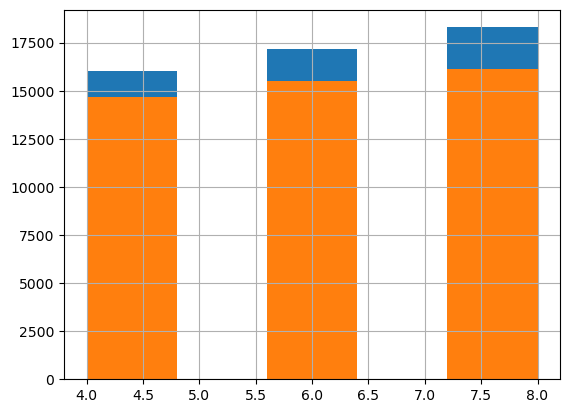

In [36]:
#Plotting and comparing the cylinders histograms
data['cylinders'].hist(bins=5)
data_filt['cylinders'].hist(bins=5)

The distibution is pretty much the same, we have lost 10% of our data, but no changes in tendencies. the more the number of cylinders the more popular those cars

<AxesSubplot:>

<AxesSubplot:>

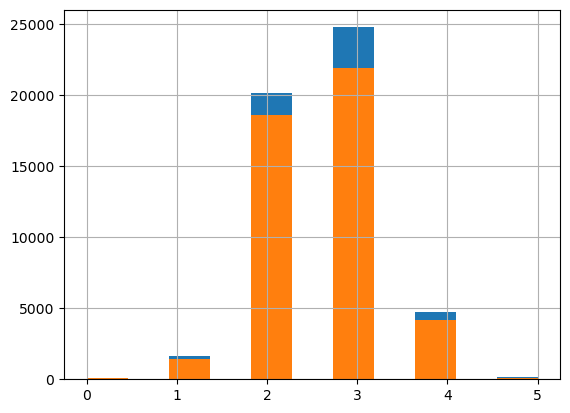

In [37]:
#Plotting and comparing the condition histograms
data['condition'].hist(bins=11)
data_filt['condition'].hist(bins=11)

The same distribution as we had before cleaning outliers and the same tendencies depending on the condition. That's good.  our conclusions will be relevant for the original data.

<AxesSubplot:>

<AxesSubplot:>

(0.0, 200.0)

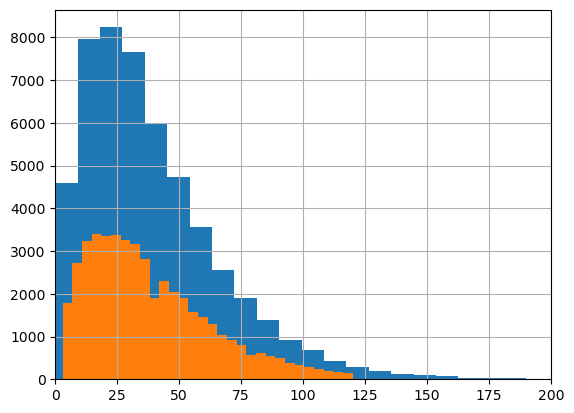

In [38]:
#Plotting and comparing the days_listed histograms
data['days_listed'].hist(bins=30)
data_filt['days_listed'].hist(bins=30)
plt.xlim(0, 200)


Good smooth picture. The most of the cars are being sold within the month, after that we have smooth dereasing curve, so, again the mean is more than the median, it's reasonable. And selling the car within more than 2 months is unusual.

## Ads lifetime

let's Study how many days advertisements were displayed (`days_listed`) more carefully. We will Calculate the mean and median.

In [39]:
data_filt['days_listed'].describe()

count    46288.000000
mean        38.191734
std         24.675352
min          3.000000
25%         19.000000
50%         33.000000
75%         52.000000
max        120.000000
Name: days_listed, dtype: float64

So, the tipical life time of the ad is 20 - 50 days, here we have the most number of ads. the median is 33 days and the mean is 38, so in most cases the car is beeing sold in a month (30 - 40 days). It is not likely to sell the care very quickly(less than in 20 days), or longer than in 2 months.

## Average price per each type of vehicle

Let's analyze the number of ads and the average price for each type of vehicle. We will plot a graph showing the dependence of the prices on the cirtain vehicle type. Then, we will find the two types with the greatest number of ads.

<AxesSubplot:xlabel='type'>

Text(0.5, 1.0, 'Mean price for different car type')

<AxesSubplot:xlabel='type'>

Text(0.5, 1.0, 'Number of ads for different car type')

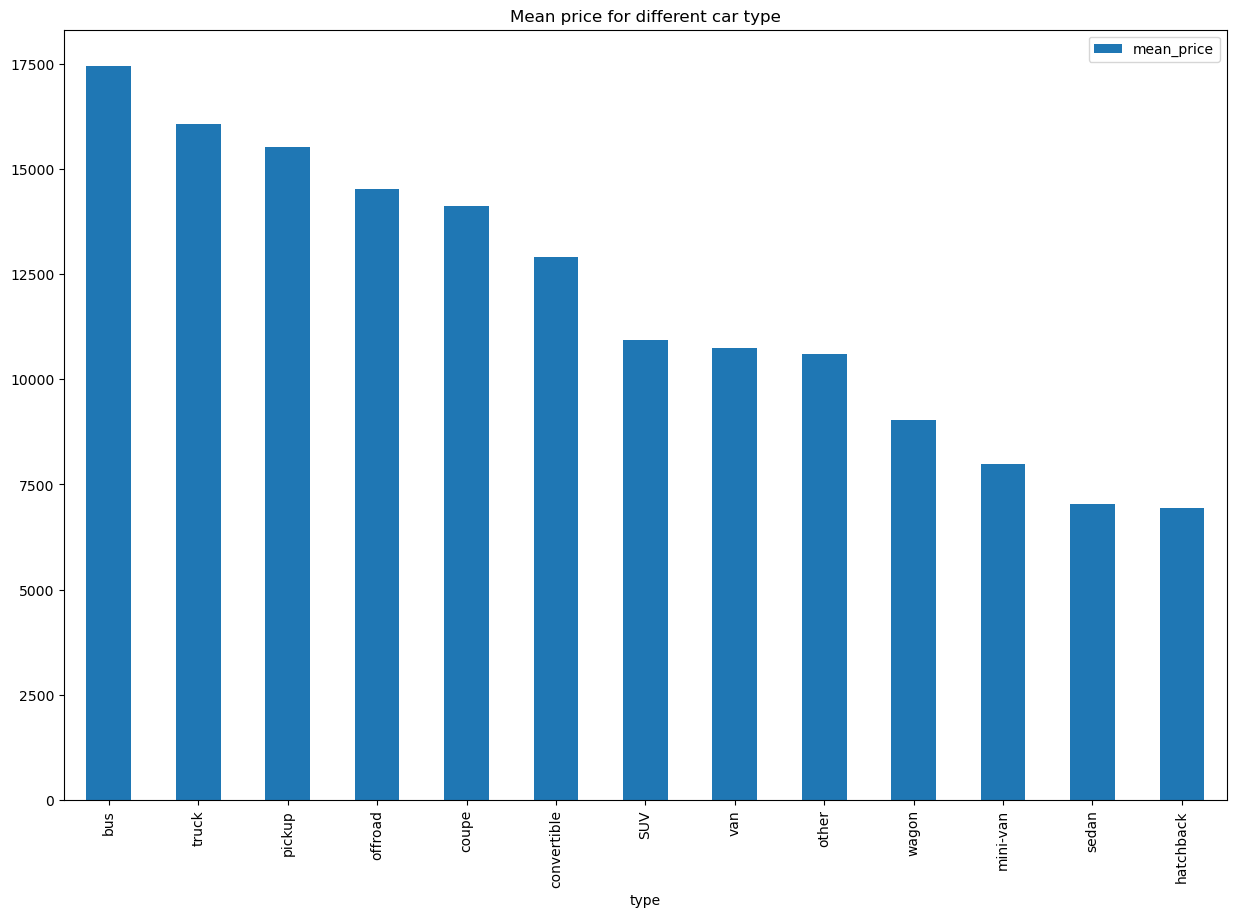

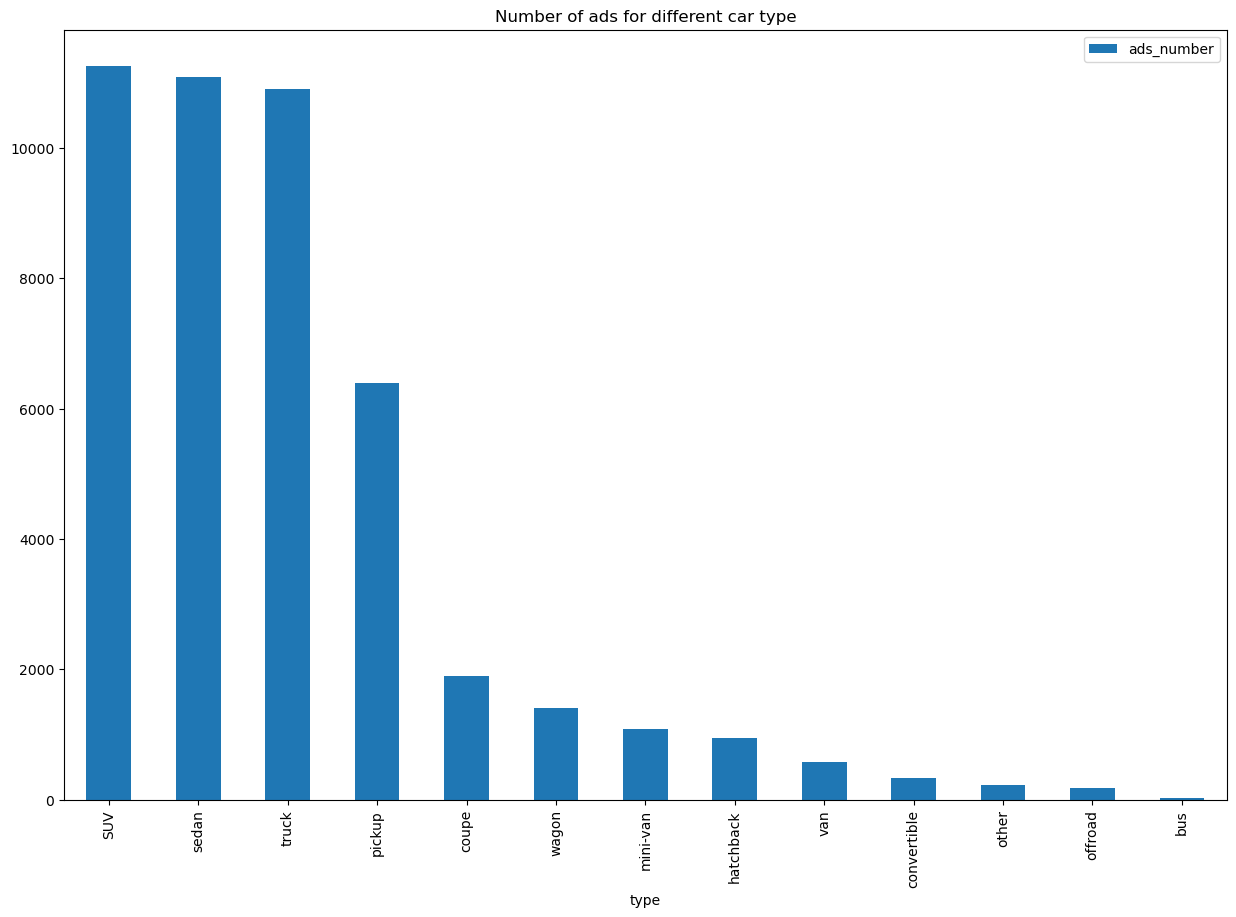

In [40]:
#Creating a pivot table showing avereage price and number od ads for a cirtain types of vehicle
avg_price = data_filt.pivot_table(index = 'type', values = 'price', aggfunc = ['mean', 'count'])
avg_price.columns = ('mean_price', 'ads_number')

#Plotting the graf which shows mean price for specific type
avg_price.sort_values('mean_price', ascending = False).plot(y='mean_price', figsize=(15,10), kind = 'bar')
plt.title('Mean price for different car type')

#Plotting the graf which shows number of ads for specific type
avg_price.sort_values('ads_number', ascending = False).plot(y='ads_number', figsize=(15,10), kind = 'bar')
plt.title('Number of ads for different car type')

So the most expensive types are buses and trucks,  as we could guess. In the same time the most popular are SUV and sedan. And for trucks we have the third place in the number of ads category. It's a bit suprising. <br> We have more than 11000 ads for SUV and Sedan types of vehicle. Rather big value. We will use these types to investigate the factors that price depend on.

## Price factors

What factors impact the price most? We'll Take each of the popular types detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color.

Let's start with SUV. First we wil explore the quantative factors, and then - categorial

,age,price,year_mileage
age,1.000000,-0.645162,-0.614585
price,-0.645162,1.000000,0.289391
year_mileage,-0.614585,0.289391,1.000000


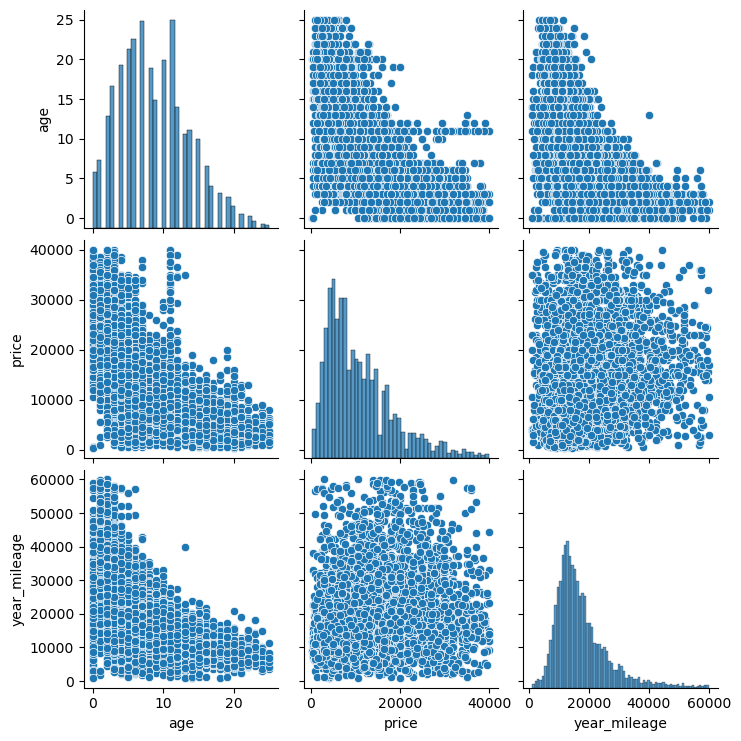

In [41]:
#filtering the most SUV type
data_pop_q1 = data_filt.query('type =="SUV"')[[
    'age', 'price', 'year_mileage']]

#Plotting the graphs
sns.pairplot(data_pop_q1)
data_pop_q1.corr()

We see negative correlation betwween the price and age of the car (co = -0,65), and there is very very week correlation between the price  and mileage per year for SUV (co = -0,29). But correlation is so weak that we can say there is only correlation between price and the age but no with the mileage. Let's look the same way to the second popular type sedan

,age,price,year_mileage
age,1.000000,-0.673906,-0.587512
price,-0.673906,1.000000,0.291220
year_mileage,-0.587512,0.291220,1.000000


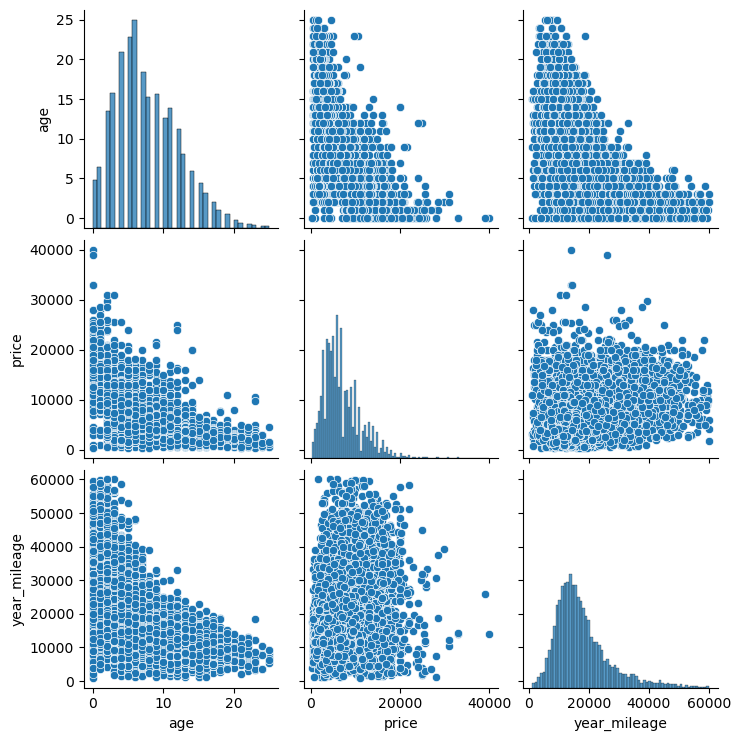

In [42]:
#filter the sedan data
data_pop_q2 = data_filt.query('type =="sedan"')[['age', 'price', 'year_mileage']]

#Plotting the graphs and printing correlation table
sns.pairplot(data_pop_q2)
data_pop_q2.corr()

The same situation we have for sedans. Coefficients are slightly different, but pretty much the same.  <br> Let's look at categorical factors

In [43]:
#filter the data for SUV
data_pop_c1 = data_filt.query('type =="SUV"')[['price', 'condition','transmission', 'paint_color']]

#Check whether we have more than 5 ads for the categories
for col in data_pop_c1.columns:
    if not "pri" in col:
        data_pop_c1.groupby(col)[col].value_counts()
 

condition  condition
0          0              18
1          1             293
2          2            4024
3          3            5855
4          4            1044
5          5              13
Name: condition, dtype: int64

transmission  transmission
automatic     automatic       10701
manual        manual            457
other         other              89
Name: transmission, dtype: int64

paint_color  paint_color
black        black          1967
blue         blue            950
brown        brown           349
custom       custom          267
green        green           397
grey         grey           1085
orange       orange           75
purple       purple           39
red          red             850
silver       silver         1446
unknown      unknown        2000
white        white          1780
yellow       yellow           42
Name: paint_color, dtype: int64

For 0 and 5 condition we do not have enough entries to analyse. So we exclude them. The same is true for purple and yellow paint color.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'black'),
  Text(2, 0, 'blue'),
  Text(3, 0, 'red'),
  Text(4, 0, 'white'),
  Text(5, 0, 'silver'),
  Text(6, 0, 'grey'),
  Text(7, 0, 'brown'),
  Text(8, 0, 'orange'),
  Text(9, 0, 'custom'),
  Text(10, 0, 'green')])

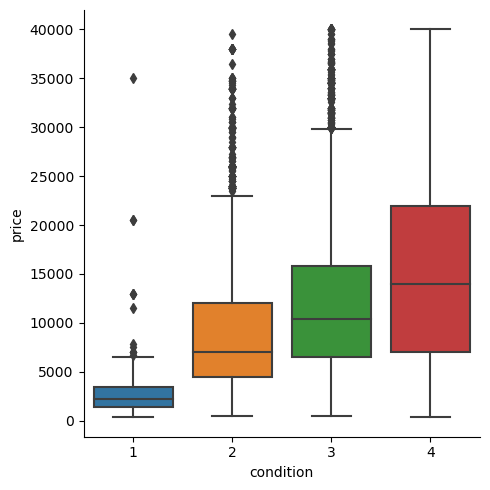

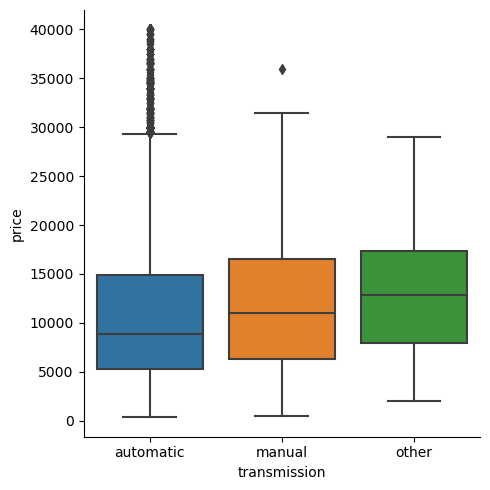

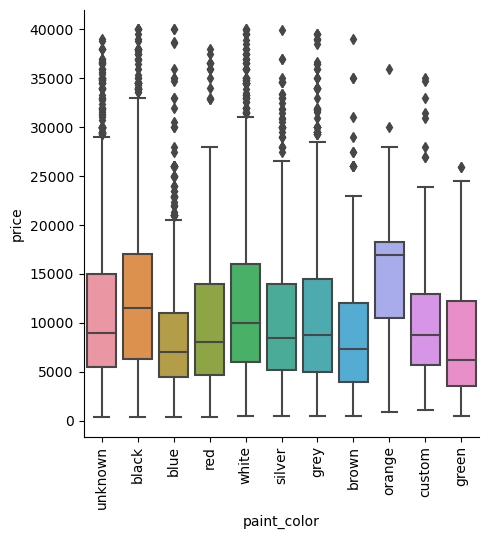

In [44]:
#Excluding non informative categories
data_pop_c1 = data_pop_c1.query('condition!=0 and condition!=5 and paint_color!= "purple" and paint_color!="yellow"')

#plotting the grafs
sns.catplot(y='price', x='condition', data=data_pop_c1, kind='box')
sns.catplot(y='price', x='transmission', data=data_pop_c1, kind='box')
sns.catplot(y='price', x='paint_color', data=data_pop_c1, kind='box')
plt.xticks(rotation=90)

For SUV we see the strong dependence of price on the condition of the car, but in like new and excelent condition we see the same middle bottom price while for like new condition the spread is much wider. May be for some people like new is the same as excelent. The range of price depending on types of transmission is almost the same, we can not see there is any correlation. Even median price of the manual transmission cars are a bit higher than for automatic. But we can not state there is a pattern as the spreads in prices are big an pretty much the same. Also the price doesn't depend on paint color for SUV. But we can say that SUV in orange and black colors are the most expensive in average.

<br> Let's analize the sedan cars

In [45]:
#filter the data for sedans
data_pop_c2 = data_filt.query('type =="sedan"')[['price', 'condition','transmission', 'paint_color']]

#Check whether we have more than 5 ads for the categories
for col in data_pop_c2.columns:
    if not "pri" in col:
        data_pop_c2.groupby(col)[col].value_counts()

condition  condition
0          0              37
1          1             279
2          2            4039
3          3            5498
4          4            1195
5          5              32
Name: condition, dtype: int64

transmission  transmission
automatic     automatic       10471
manual        manual            543
other         other              66
Name: transmission, dtype: int64

paint_color  paint_color
black        black          1605
blue         blue           1138
brown        brown           246
custom       custom          251
green        green           194
grey         grey           1494
orange       orange            9
purple       purple           26
red          red             850
silver       silver         1878
unknown      unknown        2001
white        white          1367
yellow       yellow           21
Name: paint_color, dtype: int64

We should exclude the worst and the best conditions as there is not anough cars for sedans aswell. For paint colors we have outsiders yellow, purple and orange.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'red'),
  Text(1, 0, 'black'),
  Text(2, 0, 'white'),
  Text(3, 0, 'grey'),
  Text(4, 0, 'silver'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'custom'),
  Text(7, 0, 'blue'),
  Text(8, 0, 'green'),
  Text(9, 0, 'brown')])

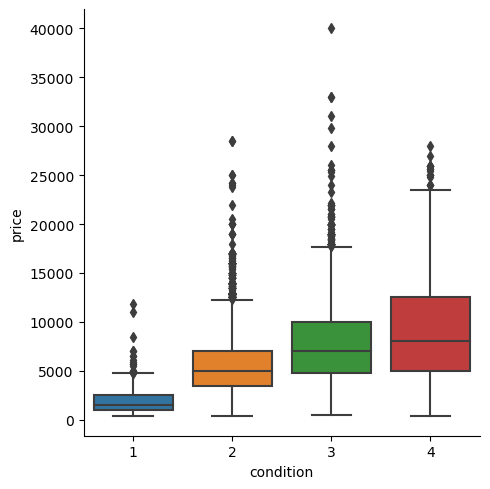

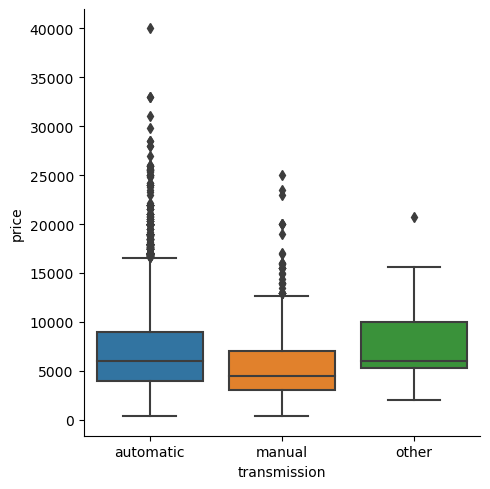

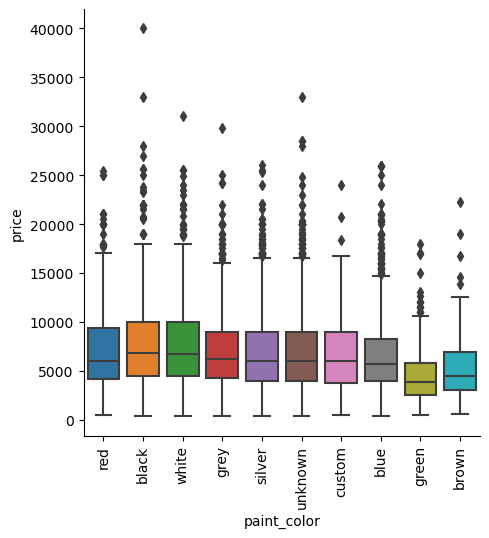

In [46]:
#Excluding non informative categories
data_pop_c2 = data_pop_c2.query(
    'condition!=0 and condition!=5 and paint_color!= "purple" and paint_color!="yellow" and  paint_color!="orange"')

#plotting the grafs
sns.catplot(y='price', x='condition', data=data_pop_c2, kind='box')
sns.catplot(y='price', x='transmission', data=data_pop_c2, kind='box')
sns.catplot(y='price', x='paint_color', data=data_pop_c2, kind='box')
plt.xticks(rotation=90)

For sedans we have the same situation in terms of condition as we had for SUV. The price depends on car condition. The better condition the higher the price. Sedans with manual transmission are cheaper, we have that correlation for sedans, but again the spreads of the prices are big enough, so we hardly can say there is a dependence of price on the transmission type. And the price dosen't depend on paint color. Almost the same prices for every color. We can say that green and brown are not popular for sedans as those cars are cheaper in average.<br> 

## General conclusion

In the project we needed to study data collected over the last few years and determine which factors influence the price of a vehicle. The purpose of the analysis was to determine the factors which influence to the price of the car and the correlation between different factors and the price of the car.

We recieved the data consisting of 51525 rows. There was no problems with duplicates, but were some issues with missing values. We have fixed issues with the missing values. We replaced them with the most common values form the data frame or with precize info that we had in our data. After that we changed types of several columns so that we could analize them. With theese changes we  lost just one row ofour data, that was obviousely one of future outliers. Then we enriched data with the day of the week, month, and year the ad was placed, the vehicle's age (in years) when the ad was placed and the vehicle's average mileage per year in order to determine the factors which influence to the car price. After that we performed exploritary data analysis, cleaned the data from outliers but saved 90% of the initial data and vestigated the key factors of price as the vehicle's age when the ad was placed, average mileage per year, number of cylinders, condition, and paint color. For EDA we took two most popular car types: SUV and sedan 

We checked all the 5 hypotheses:

1. Car age have negative correlation with the price of the car. **This hypothese is correct, we have a correlation strong enough (about -0,6).** 
2. Average mileage per year have negative correlation with the price of the car. The more mileage the cheaper the price of the car. **This hypothese absolutely incorrect, we have checked that mileage per year does not influence to the car price.** 
3. The condition of the car has positive correlation with its price. The better condition, the more expensive the price of the car. **This hypothese is correct.** But we exluded the worst and the best condition because we had not enough statisits for those categories.
4. The type of the transmission has no correlation with the price of the car. **This hypothese is correct**. We had a bit different pictures for different car types, but in average the spreads of prices are large and we can say here is no correlation. 
5. The paint color of the car has no correlation with the price of the car. **This hypothese is correct** For every single model of the car we can find the most unfavorable color, or most favorable colors but they differ from model to model and in average the price doesn't depend much on the paint color.

Also we determined that in most cases ads life time is 20-50 days, and the most number of cars could be sold within 30-40 days. The buses and trucks are the most expensive vehicles, but SUV and sedans are the most popular. Almost the half of the ads are from these car types.